In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [4]:
from tqdm import tqdm
tqdm.pandas()

In [5]:
df=pd.read_csv('C:/Users/prana/Swiggy Dataset - Sheet1.csv', encoding='latin-1')

In [6]:
df.head(5)

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id
0,7/18/2019 22:47,0,82,219,@Mahi_2510 @swiggy_in The ultimate answer will...,0,False,syamantak1,1,"61,959,419"
1,7/18/2019 22:43,0,102,129,@SwiggyCares I hope so.,0,False,Bharatbbhushn,2,"143,284,383"
2,7/18/2019 22:37,0,102,129,@SwiggyCares I think you have the order detail...,0,False,Bharatbbhushn,3,"143,284,383"
3,7/18/2019 22:35,0,13,16,"@swiggy_in People are complaining here also, i...",0,False,taifkhalid01,4,"830,340,000,000,000,000"
4,7/18/2019 22:25,0,102,129,@SwiggyCares Do you even know the meaning of y...,0,False,Bharatbbhushn,5,"143,284,383"


In [7]:
df.shape

(16712, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             16712 non-null  object
 1   favorite_count   16712 non-null  int64 
 2   followers_count  16712 non-null  int64 
 3   friends_count    16712 non-null  int64 
 4   full_text        16712 non-null  object
 5   retweet_count    16712 non-null  int64 
 6   retweeted        14384 non-null  object
 7   screen_name      16712 non-null  object
 8   tweet_id         16712 non-null  object
 9   user_id          16712 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.3+ MB


In [9]:
for i in df.columns:
    print(i)

date
favorite_count
followers_count
friends_count
full_text
retweet_count
retweeted
screen_name
tweet_id
user_id


In [10]:
for i in df.select_dtypes(include=['object','int']):
    print(i)
    print(df[i].value_counts())
    print('-----------------------------------------------------------------------------------------------')
    print('\n')

date
6/2/2019 11:12     17
6/2/2019 11:10     14
6/1/2019 12:40     13
6/16/2019 17:11    11
6/1/2019 12:39      9
                   ..
6/3/2019 18:40      1
6/3/2019 18:42      1
6/3/2019 18:44      1
6/3/2019 18:53      1
7/11/2019 12:09     1
Name: date, Length: 11097, dtype: int64
-----------------------------------------------------------------------------------------------


favorite_count
0      13789
1       1853
2        506
3        223
4        105
5         51
6         29
7         23
8         20
9         18
11         9
13         8
19         7
12         7
10         6
15         4
38         4
20         4
18         3
16         3
31         3
25         2
17         2
34         2
27         2
33         2
59         2
40         1
54         1
70         1
58         1
23         1
916        1
30         1
14         1
46         1
474        1
134        1
62         1
94         1
56         1
374        1
53         1
22         1
35         1
55         1
65

In [11]:
#here we are doing sentiment analysis so we need only text column

In [12]:
df1=df['full_text']

In [13]:
type(df1)

pandas.core.series.Series

In [14]:
text_df=pd.DataFrame(data=df1)

In [15]:
text_df.head(5)

,full_text
0,@Mahi_2510 @swiggy_in The ultimate answer will...
1,@SwiggyCares I hope so.
2,@SwiggyCares I think you have the order detail...
3,"@swiggy_in People are complaining here also, i..."
4,@SwiggyCares Do you even know the meaning of y...


In [16]:
text_df['full_text'][0]

'@Mahi_2510 @swiggy_in The ultimate answer will b sorry ... They assure that ...'

In [17]:
def preprocessor(text):
    text = re.sub('[^a-zA-Z]',' ',text)
    text = text.lower()
    text = text.strip()
    text = ' '.join([WordNetLemmatizer().lemmatize(word,pos='v') for word in text.split()])    
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return pd.Series(["".join(text)])

In [18]:
text_df =text_df['full_text'].progress_apply(lambda x :preprocessor(x))

100%|████████████████████████████████████████████████████████████████████████████| 16712/16712 [05:55<00:00, 47.04it/s]


In [19]:
text_df.head(5)

,0
0,mahi swiggy ultimate answer b sorry assure
1,swiggycares hope
2,swiggycares think order detail number present ...
3,swiggy people complain also know little disapp...
4,swiggycares even know mean tagline dm win work...


In [20]:
text_df.columns=['Text']

In [21]:
text_df.head(5)

,Text
0,mahi swiggy ultimate answer b sorry assure
1,swiggycares hope
2,swiggycares think order detail number present ...
3,swiggy people complain also know little disapp...
4,swiggycares even know mean tagline dm win work...


In [22]:
for i in text_df['Text'][0:5]:
    print(i)

mahi swiggy ultimate answer b sorry assure
swiggycares hope
swiggycares think order detail number present yea call right
swiggy people complain also know little disappoint service customer service center make direct message necessary every time everything perfect sometimes mistake happen
swiggycares even know mean tagline dm win work want explanation


In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [24]:
review=[]
for i in text_df['Text']:
    vs=analyzer.polarity_scores(i)
    review.append(str(vs))

In [25]:
len(review)

16712

In [26]:
review[0]

"{'neg': 0.149, 'neu': 0.575, 'pos': 0.276, 'compound': 0.2732}"

In [27]:
re.findall("\d+\.\d+",review[0])

['0.149', '0.575', '0.276', '0.2732']

In [28]:
senti=[]
for i in range(len(review)):
    senti.append(re.findall("\d+\.\d+",review[i]))

In [29]:
senti[0:10]

[['0.149', '0.575', '0.276', '0.2732'],
 ['0.0', '0.256', '0.744', '0.4404'],
 ['0.0', '0.86', '0.14', '0.0772'],
 ['0.252', '0.621', '0.128', '0.3832'],
 ['0.0', '0.611', '0.389', '0.6249'],
 ['0.0', '0.799', '0.201', '0.5448'],
 ['0.176', '0.733', '0.092', '0.3182'],
 ['0.0', '1.0', '0.0', '0.0'],
 ['0.0', '0.519', '0.481', '0.7964'],
 ['0.0', '0.781', '0.219', '0.4939']]

In [30]:
sen_df=pd.DataFrame(senti)

In [31]:
sen_df.head()

,0,1,2,3
0,0.149,0.575,0.276,0.2732
1,0.0,0.256,0.744,0.4404
2,0.0,0.86,0.14,0.0772
3,0.252,0.621,0.128,0.3832
4,0.0,0.611,0.389,0.6249


In [32]:
final_df=pd.concat((text_df,sen_df),axis=1)

In [33]:
final_df.head()

,Text,0,1,2,3
0,mahi swiggy ultimate answer b sorry assure,0.149,0.575,0.276,0.2732
1,swiggycares hope,0.0,0.256,0.744,0.4404
2,swiggycares think order detail number present ...,0.0,0.86,0.14,0.0772
3,swiggy people complain also know little disapp...,0.252,0.621,0.128,0.3832
4,swiggycares even know mean tagline dm win work...,0.0,0.611,0.389,0.6249


In [34]:
final_df.columns=['Tweets','negative','neutral','positive','compound']

In [35]:
final_df.head()

,Tweets,negative,neutral,positive,compound
0,mahi swiggy ultimate answer b sorry assure,0.149,0.575,0.276,0.2732
1,swiggycares hope,0.0,0.256,0.744,0.4404
2,swiggycares think order detail number present ...,0.0,0.86,0.14,0.0772
3,swiggy people complain also know little disapp...,0.252,0.621,0.128,0.3832
4,swiggycares even know mean tagline dm win work...,0.0,0.611,0.389,0.6249


In [36]:
final_df['negative']=final_df['negative'].astype('float')
final_df['neutral']=final_df['neutral'].astype('float')
final_df['positive']=final_df['positive'].astype('float')
final_df['compound']=final_df['compound'].astype('float')

In [37]:
final_df=final_df.drop('compound',axis=1)

In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tweets    16712 non-null  object 
 1   negative  16712 non-null  float64
 2   neutral   16712 non-null  float64
 3   positive  16712 non-null  float64
dtypes: float64(3), object(1)
memory usage: 522.4+ KB


In [39]:
final_df.head()

,Tweets,negative,neutral,positive
0,mahi swiggy ultimate answer b sorry assure,0.149,0.575,0.276
1,swiggycares hope,0.000,0.256,0.744
2,swiggycares think order detail number present ...,0.000,0.860,0.140
3,swiggy people complain also know little disapp...,0.252,0.621,0.128
4,swiggycares even know mean tagline dm win work...,0.000,0.611,0.389


In [40]:
max_val=final_df.max(axis=1)
max_val

C:\Users\prana\AppData\Local\Temp/ipykernel_26028/101883367.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  max_val=final_df.max(axis=1)


0        0.575
1        0.744
2        0.860
3        0.621
4        0.611
         ...  
16707    0.611
16708    1.000
16709    0.694
16710    0.919
16711    0.800
Length: 16712, dtype: float64

In [41]:
type(max_val)

pandas.core.series.Series

In [42]:
final_df['maximum_val']=max_val
final_df

,Tweets,negative,neutral,positive,maximum_val
0,mahi swiggy ultimate answer b sorry assure,0.149,0.575,0.276,0.575
1,swiggycares hope,0.000,0.256,0.744,0.744
2,swiggycares think order detail number present ...,0.000,0.860,0.140,0.860
3,swiggy people complain also know little disapp...,0.252,0.621,0.128,0.621
4,swiggycares even know mean tagline dm win work...,0.000,0.611,0.389,0.611
...,...,...,...,...,...
16707,swiggycares say delivery box ready deliver can...,0.175,0.611,0.214,0.611
16708,swiggy deliver karta nahi install kyo karen,0.000,1.000,0.000,1.000
16709,swiggy thank spill drink wait call inform drin...,0.162,0.694,0.145,0.694
16710,swiggycares hello use swigggy regularly order ...,0.081,0.919,0.000,0.919


In [43]:
new_col=[]
for i in range(len(final_df)):
    for j in ['negative','neutral','positive']:
        if final_df[j][i]==final_df['maximum_val'][i]:
            new_col.append(j)
            break

In [44]:
len(new_col)

16712

In [45]:
final_df['new_col']=new_col

In [46]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tweets       16712 non-null  object 
 1   negative     16712 non-null  float64
 2   neutral      16712 non-null  float64
 3   positive     16712 non-null  float64
 4   maximum_val  16712 non-null  float64
 5   new_col      16712 non-null  object 
dtypes: float64(4), object(2)
memory usage: 783.5+ KB


In [47]:
final_df.head()

,Tweets,negative,neutral,positive,maximum_val,new_col
0,mahi swiggy ultimate answer b sorry assure,0.149,0.575,0.276,0.575,neutral
1,swiggycares hope,0.000,0.256,0.744,0.744,positive
2,swiggycares think order detail number present ...,0.000,0.860,0.140,0.860,neutral
3,swiggy people complain also know little disapp...,0.252,0.621,0.128,0.621,neutral
4,swiggycares even know mean tagline dm win work...,0.000,0.611,0.389,0.611,neutral


In [116]:
final_df['new_col'].value_counts()

1    15463
2      809
0      440
Name: new_col, dtype: int64

In [48]:
final_df.new_col=final_df.new_col.map({'negative':0,'neutral':1,'positive':2}).astype(int)

In [49]:
final_df['new_col'].dtypes

dtype('int32')

In [50]:
final_df['negative'].value_counts()

0.000    8361
0.167      53
0.231      49
0.333      45
0.259      43
         ... 
0.714       1
0.640       1
0.554       1
0.488       1
0.587       1
Name: negative, Length: 599, dtype: int64

In [51]:
y=final_df['new_col']
x=final_df['Tweets']

In [52]:
print(type(x))
print(type(y))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [53]:
X=pd.DataFrame(x)
Y=pd.DataFrame(y)

In [54]:
print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25, train_size=0.75, random_state=1)


In [56]:
x_train.head()

,Tweets
8960,iamkash kr zomato swiggy dominos india starbuc...
9950,rajeshashar swiggycares cry workshops hear tim...
8605,swiggy swiggycares amount deduct order place w...
11643,perfect time mumbai order motichoor laddoo swiggy
14030,swiggycares people even listen


In [57]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12534, 1)
(12534, 1)
(4178, 1)
(4178, 1)


In [58]:
x_train.head()

,Tweets
8960,iamkash kr zomato swiggy dominos india starbuc...
9950,rajeshashar swiggycares cry workshops hear tim...
8605,swiggy swiggycares amount deduct order place w...
11643,perfect time mumbai order motichoor laddoo swiggy
14030,swiggycares people even listen


In [59]:
y_test.head()

,new_col
15196,1
14040,1
4108,1
22,1
110,1


In [60]:
text_train = x_train.Tweets.to_list()
token = Tokenizer()
token.fit_on_texts(text_train)

In [61]:
encoded_text=token.texts_to_sequences(text_train)

In [62]:
max_length=200
x_text_train=sequence.pad_sequences(encoded_text,maxlen=max_length,padding='pre')
x_text_train

array([[    0,     0,     0, ...,    52,  1321,  2892],
       [    0,     0,     0, ...,   414,   632,   232],
       [    0,     0,     0, ...,  1734,    14,     1],
       ...,
       [    0,     0,     0, ...,    26,   515, 17541],
       [    0,     0,     0, ...,   311,    32,   260],
       [    0,     0,     0, ..., 17547, 17548,  4399]])

In [63]:

x_text_train.shape

(12534, 200)

In [64]:
text_test= x_test.Tweets.to_list()
token = Tokenizer()
token.fit_on_texts(text_test)

In [65]:
encoded_text1=token.texts_to_sequences(text_test)

In [66]:
max_length=200
x_text_test=sequence.pad_sequences(encoded_text1,maxlen=max_length,padding='pre')
x_text_test

array([[   0,    0,    0, ...,    4,    5, 3231],
       [   0,    0,    0, ...,  805,  364,  138],
       [   0,    0,    0, ...,  141,  806,  745],
       ...,
       [   0,    0,    0, ..., 8626,   30,  184],
       [   0,    0,    0, ...,  466, 1703,   84],
       [   0,    0,    0, ...,   31,   44,    3]])

In [67]:
x_text_test.shape

(4178, 200)

In [68]:
y_train.head()

,new_col
8960,1
9950,1
8605,1
11643,1
14030,1


In [69]:
y_train['new_col'].value_counts()

1    11595
2      613
0      326
Name: new_col, dtype: int64

## naive bayes

In [70]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(x_text_train, y_train)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [71]:
y_train.dtypes

new_col    int32
dtype: object

In [72]:
ypred_nb = nb_model.predict(x_text_test)

In [73]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [74]:
metrics.accuracy_score(y_test,ypred_nb)

0.3774533269506941

In [75]:
print(classification_report(y_test, ypred_nb))

              precision    recall  f1-score   support

           0       0.03      0.41      0.06       114
           1       0.98      0.38      0.54      3868
           2       0.06      0.36      0.10       196

    accuracy                           0.38      4178
   macro avg       0.36      0.38      0.23      4178
weighted avg       0.91      0.38      0.51      4178



In [76]:
np.unique(ypred_nb)

array([0, 1, 2])

In [77]:
np.unique(y_test)

array([0, 1, 2])

In [78]:
y_test.dtypes

new_col    int32
dtype: object

In [79]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score



In [80]:
y_preb_probs =nb_model.predict_proba(x_text_test)

In [81]:
roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr" )

0.5701663480473846

In [82]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, ypred_nb)

0.0748583595236802

## LogisticRegression

In [83]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_text_train, y_train)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
ypred_LR=classifier.predict(x_text_test)

In [85]:
metrics.accuracy_score(y_test,ypred_LR)

0.9258018190521781

In [113]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, ypred_LR)

print(cf_matrix)

[[   0  114    0]
 [   0 3868    0]
 [   0  196    0]]


In [109]:
cr_matrix=classification_report(y_test, ypred_LR)
print(cr_matrix)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.93      1.00      0.96      3868
           2       0.00      0.00      0.00       196

    accuracy                           0.93      4178
   macro avg       0.31      0.33      0.32      4178
weighted avg       0.86      0.93      0.89      4178



C:\Users\prana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


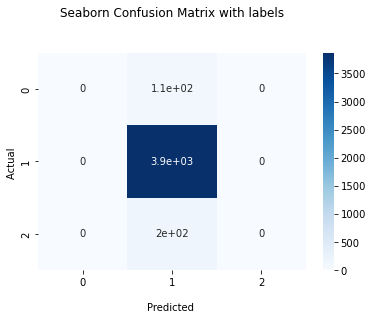

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted ')
ax.set_ylabel('Actual ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1', '2'])
ax.yaxis.set_ticklabels(['0','1', '2'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [87]:
y_preb_probs =classifier.predict_proba(x_text_test)
roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr" )

0.7579542544269215

In [88]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, ypred_LR)

0.0

## RandomForest

In [89]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_text_train, y_train)

C:\Users\prana\AppData\Local\Temp/ipykernel_26028/4057593989.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_text_train, y_train)


RandomForestClassifier()

In [90]:
ypred_RF=classifier.predict(x_text_test)

In [91]:
metrics.accuracy_score(y_test,ypred_RF)

0.9246050741981809

In [92]:
print(classification_report(y_test, ypred_RF))

              precision    recall  f1-score   support

           0       0.29      0.04      0.06       114
           1       0.93      0.99      0.96      3868
           2       0.45      0.10      0.16       196

    accuracy                           0.92      4178
   macro avg       0.56      0.37      0.39      4178
weighted avg       0.89      0.92      0.90      4178



In [93]:
y_preb_probs =classifier.predict_proba(x_text_test)
roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr" )

0.7736186411112612

In [94]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, ypred_RF)

0.17482050179978112

## KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_text_train, y_train)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [96]:
ypred_KNN=classifier.predict(x_text_test)

In [97]:
metrics.accuracy_score(y_test,ypred_KNN)

0.917903303015797

In [98]:
print(classification_report(y_test, ypred_KNN))

              precision    recall  f1-score   support

           0       0.09      0.02      0.03       114
           1       0.93      0.99      0.96      3868
           2       0.22      0.05      0.08       196

    accuracy                           0.92      4178
   macro avg       0.41      0.35      0.35      4178
weighted avg       0.87      0.92      0.89      4178



In [99]:
y_preb_probs =classifier.predict_proba(x_text_test)
roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr" )

0.6187533931422855

In [100]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, ypred_KNN)

0.08450167142160951

## DecisionTree

In [101]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_text_train, y_train)

DecisionTreeClassifier()

In [102]:
ypred_DT=classifier.predict(x_text_test)
metrics.accuracy_score(y_test,ypred_DT)

0.8681187170895165

In [103]:
(0.08+0.26+3*0.93)/6

0.5216666666666666

In [104]:
print(classification_report(y_test, ypred_DT))

              precision    recall  f1-score   support

           0       0.10      0.10      0.10       114
           1       0.93      0.93      0.93      3868
           2       0.14      0.16      0.15       196

    accuracy                           0.87      4178
   macro avg       0.39      0.40      0.39      4178
weighted avg       0.87      0.87      0.87      4178



In [105]:
y_preb_probs =classifier.predict_proba(x_text_test)
roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr" )

0.5562603275413733

In [106]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, ypred_DT)

0.10096405674215736

## plotting the accuracy scores

In [107]:
import matplotlib.pyplot as plt
data={"Algorithms":['naive bayes','LogisticRegression','RandomForest','KNN','DecisionTree'],
      "prediction_percentage":[37.7,92.5,92.5,91.7,86.6]}
data_=pd.DataFrame(data)
data_

,Algorithms,prediction_percentage
0,naive bayes,37.7
1,LogisticRegression,92.5
2,RandomForest,92.5
3,KNN,91.7
4,DecisionTree,86.6


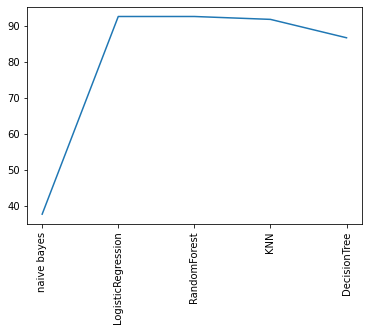

In [108]:
plt.plot(data_['Algorithms'],data_['prediction_percentage'])
plt.xticks(rotation=90);